<a href="https://colab.research.google.com/github/Mystique1337/Deep-Learning-Inspo/blob/main/Deep_Learniing%20Inspo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importing Required Libraries

!pip install catboost
import torch
import torchvision
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [5]:
from google.colab import files
files.upload()

Saving cleaned.csv to cleaned.csv


{'cleaned.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,VAT\n1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknown,S,2,0,Mr,5.4375\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,C,2,0,Mrs,53.462475\n3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,Unknown,S,1,1,Miss,5.94375\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C,S,2,0,Mrs,39.825\n5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,Unknown,S,1,1,Mr,6.0375000000000005\n6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Unknown,Q,1,1,Mr,6.343724999999999\n7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,1,1,Mr,38.896874999999994\n8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,Unknown,S,5,0,Master,15.806249999999999\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333

In [6]:
df = pd.read_csv('cleaned.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
 14  Title        891 non-null    object 
 15  VAT          891 non-null    float64
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,VAT
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,0,Mr,5.437500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,0,Mrs,53.462475
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,1,Miss,5.943750
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,0,Mrs,39.825000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,1,Mr,6.037500


In [9]:
#creating a list to store the targets and features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','Title', 'FamilySize', 'IsAlone','VAT']
target = 'Survived'

In [10]:
#classifyuing features
cat_features = ['Pclass', 'Sex','Cabin', 'Embarked','Title']
num_features = ['Age', 'SibSp', 'Parch', 'Fare','FamilySize','VAT']

In [11]:
#performing encoding on categorical features
for i in cat_features:
    df[i] = LabelEncoder().fit_transform(df[i])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,VAT
0,1,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2,2,0,11,5.437500
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,2,0,12,53.462475
2,3,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2,1,1,8,5.943750
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,2,0,12,39.825000
4,5,0,2,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2,1,1,11,6.037500


In [13]:

X = df[features]
y = df[target]

In [14]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,VAT
0,2,1,22.0,1,0,7.2500,2,11,2,0,5.437500
1,0,0,38.0,1,0,71.2833,0,12,2,0,53.462475
2,2,0,26.0,0,0,7.9250,2,8,1,1,5.943750
3,0,0,35.0,1,0,53.1000,2,12,2,0,39.825000
4,2,1,35.0,0,0,8.0500,2,11,1,1,6.037500


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,VAT
0,2,1,22.0,1,0,7.2500,2,11,2,0,5.437500
1,0,0,38.0,1,0,71.2833,0,12,2,0,53.462475
2,2,0,26.0,0,0,7.9250,2,8,1,1,5.943750
3,0,0,35.0,1,0,53.1000,2,12,2,0,39.825000
4,2,1,35.0,0,0,8.0500,2,11,1,1,6.037500
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,27.0,0,0,13.0000,2,14,1,1,9.750000
887,0,0,19.0,0,0,30.0000,2,8,1,1,22.500000
888,2,0,21.5,1,2,23.4500,2,8,4,0,17.587500
889,0,1,26.0,0,0,30.0000,0,11,1,1,22.500000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.shape

(623, 11)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
#initial model
class TitanicModel(nn.Module):
    def __init__(self, input_size):
        super(TitanicModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(11, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Dropout(0.1),
            nn.ReLU(),
            nn.Linear(32, 2), )

    def forward(self, x):
        return self.fc(x)




In [ ]:
#improved model
class TitanicModel(nn.Module):
    def __init__(self, input_size):
        super(TitanicModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
model = TitanicModel(11)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 32
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, axis=1)
    accuracy = (y_pred_classes == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')

Epoch [10/32], Loss: 0.5075
Epoch [20/32], Loss: 0.4376
Epoch [30/32], Loss: 0.3904
Accuracy on test set: 0.8246


In [ ]:


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Number of epochs
epochs = 32

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_x, batch_y in train_loader:

        # Forward pass
        outputs = model(batch_x)
        # BCELoss expects outputs of shape (batch_size, ) for binary tasks
        # or (batch_size, 1) same as your output. If the shape is (batch_size,1),
        # make sure to flatten it for BCELoss or pass reduction properly.

        # Compute loss
        loss = criterion(outputs, batch_y)

        # Backprop and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print loss each epoch (optional)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

##########################################
# Prediction
##########################################
# Now, for inference on X_test:
# X_test: (num_test_samples, 7)

model.eval()
with torch.no_grad():
    # X_test_tensor = torch.from_numpy(X_test).float()  # if X_test is numpy
    outputs = model(X_test_tensor)
    preds = (outputs > 0.5).int().view(-1)  # shape: [num_test_samples]
    print(preds)
    accuracy = (y_pred_classes == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')


Epoch [1/32], Loss: 0.4162
Epoch [2/32], Loss: 0.4055
Epoch [3/32], Loss: 0.4166
Epoch [4/32], Loss: 0.3991
Epoch [5/32], Loss: 0.3938
Epoch [6/32], Loss: 0.4244
Epoch [7/32], Loss: 0.3819
Epoch [8/32], Loss: 0.3882
Epoch [9/32], Loss: 0.3928
Epoch [10/32], Loss: 0.4079
Epoch [11/32], Loss: 0.3642
Epoch [12/32], Loss: 0.3719
Epoch [13/32], Loss: 0.3692
Epoch [14/32], Loss: 0.3705
Epoch [15/32], Loss: 0.3845
Epoch [16/32], Loss: 0.3551
Epoch [17/32], Loss: 0.3573
Epoch [18/32], Loss: 0.3662
Epoch [19/32], Loss: 0.3687
Epoch [20/32], Loss: 0.3660
Epoch [21/32], Loss: 0.3558
Epoch [22/32], Loss: 0.3769
Epoch [23/32], Loss: 0.3629
Epoch [24/32], Loss: 0.3547
Epoch [25/32], Loss: 0.3515
Epoch [26/32], Loss: 0.3503
Epoch [27/32], Loss: 0.3481
Epoch [28/32], Loss: 0.3248
Epoch [29/32], Loss: 0.3432
Epoch [30/32], Loss: 0.3577
Epoch [31/32], Loss: 0.3718
Epoch [32/32], Loss: 0.3474
tensor([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 1

In [ ]:
model.eval()
with torch.no_grad():
    # X_test_tensor = torch.from_numpy(X_test).float()  # if X_test is numpy
    outputs = model(X_train_tensor)
    y_pred = model(X_train_tensor)
    y_pred_classes = torch.argmax(y_pred, axis=1)
    preds = (outputs > 0.5).int().view(-1)  # shape: [num_test_samples]
    print(preds)
    accuracy = (y_pred_classes == y_train_tensor).sum().item() / y_train_tensor.size(0)

    print(f'Accuracy on train set: {accuracy:.4f}')


tensor([1, 0, 1,  ..., 0, 0, 1], dtype=torch.int32)
Accuracy on train set: 0.8700


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8059701492537313
Precision: 0.7931034482758621
Recall: 0.6699029126213593
F1 Score: 0.7263157894736842
Confusion Matrix:
 [[147  18]
 [ 34  69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       165
           1       0.79      0.67      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



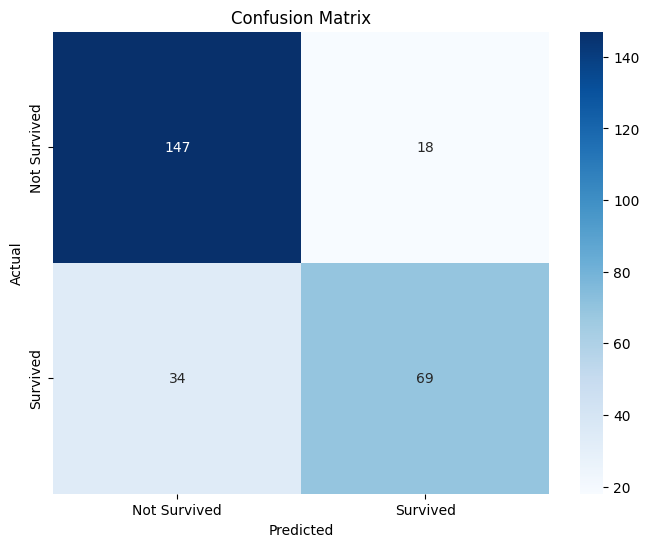

In [ ]:


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()